In [7]:
from simpledbf import Dbf5

import pandas as pd

import geopandas as gpd

from shapely.geometry import Point, Polygon

import requests

%matplotlib inline 

# Load DOB Inspections dataset

In [68]:
dbf = Dbf5('data/merge_footprints/merge_footprints.dbf')

all_inspections = dbf.to_dataframe()

In [69]:
print(len(all_inspections))
print(list(all_inspections))
all_inspections.head()[['dt_lstm','bin', 'Elevtrs']]

120593
['bin', 'dt_lstm', 'tm_lstm', 'shap_ln', 'shape_r', 'feat_cd', 'name', 'grondlv', 'doitt_d', 'cnstrc_', 'heghtrf', 'lststty', 'BiB', 'BIS_P_A', 'BIS_P_N', 'BIS_tt_', 'Boilers', 'Bldng_M', 'CnstrcD', 'CnstrcE', 'Cranes', 'DOBNOW_', 'ECB', 'ElctrcD', 'ElctrcE', 'Elevtrs', 'ERT', 'Facades', 'Illgl_C', 'Mtrl_Fl', 'Mch_C_E', 'PlmbngD', 'PlmbngE', 'QOL', 'Sstnblt', 'SWO', 'Tnnt_Hr', 'ttl_ccd', 'ttl_cmp', 'ttl_nsp', 'ttl_vlt', 'Vacate', 'Wrkr_Fl', 'WWOP', 'Latitud', 'Longitd', 'Borough', 'Address', 'BIS_Prf', 'Ttl_Prm', 'Total', 'cyclomd']


,dt_lstm,bin,Elevtrs
0,2017/08/22,4299860.0,0.0
1,2017/08/22,4300452.0,0.0
2,2017/08/22,4305475.0,0.0
3,2017/08/22,4306537.0,0.0
4,2017/12/19,3413894.0,2.0


In [70]:
all_inspections['Elevtrs'].mean()

0.1669416964500427

In [72]:
#  Confirm these are the elevator inspections: https://www1.nyc.gov/assets/buildings/html/dob-building-profiles.html#
elevator_inspections = all_inspections[all_inspections['Elevtrs'] != 0.0]
print("{} elevators inspections in the last 12 months".format(elevator_inspections['Elevtrs'].sum()))
print("{} buildings had elevator inspections in the last 12 months".format(len(elevator_inspections)))

20132.0 elevators inspections in the last 12 months
8184 buildings had elevator inspections in the last 12 months


### Mini question: what is the date range on the DOB Inspection dataset?

2009/02/14
2018/08/31


/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


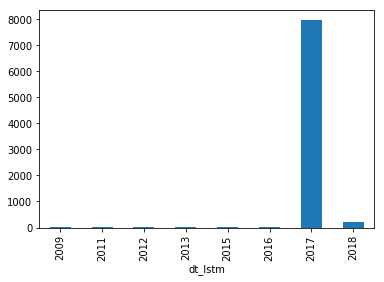

In [73]:
print(elevator_inspections['dt_lstm'].min())
print(elevator_inspections['dt_lstm'].max())

elevator_inspections['dt_lstm'] = elevator_inspections['dt_lstm'].astype("datetime64")
elevator_inspections.groupby(elevator_inspections["dt_lstm"].dt.year).count()['bin'].plot(kind="bar")

### Mini question: what is the date range on the DOB Elevators Violations dataset?

In [97]:
all_violations = pd.read_csv('data/DOB_Violations.csv')
print(f"Length with Nans: {len(violations)}")

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Length with Nans: 2035211


In [98]:
list(all_violations)

['ISN_DOB_BIS_VIOL',
 'BORO',
 'BIN',
 'BLOCK',
 'LOT',
 'ISSUE_DATE',
 'VIOLATION_TYPE_CODE',
 'VIOLATION_NUMBER',
 'HOUSE_NUMBER',
 'STREET',
 'DISPOSITION_DATE',
 'DISPOSITION_COMMENTS',
 'DEVICE_NUMBER',
 'DESCRIPTION',
 'ECB_NUMBER',
 'NUMBER',
 'VIOLATION_CATEGORY',
 'VIOLATION_TYPE']

In [115]:
all_violations['ISSUE_DATE'] = pd.to_datetime(all_violations['ISSUE_DATE'], errors='coerce')
all_violations = all_violations.dropna(subset=['ISSUE_DATE'])

In [116]:
print(len(all_violations))

2035155


## Plot frequency of types of violations

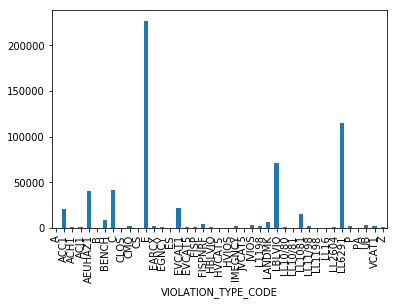

In [134]:
all_violations.groupby('VIOLATION_TYPE_CODE').count()['BIN'].plot('bar')

## Look at violations after 2000
Doing this because a lot of violations are being grouped into 1970 and 1901 for some reason

In [123]:
cut_off_date = '2000-01-01'
all_violations = all_violations[all_violations['ISSUE_DATE'] > cut_off_date]
print("Length of all_violations after date cutoff {}".format(len(all_violations)))

Length of all_violations after date cutoff 599112


# Look at just Boiler dates

In [138]:
boiler_violations = all_violations[all_violations['VIOLATION_TYPE_CODE']  == 'B']
print(len(boiler_violations))

176


Min: 2000-02-07 00:00:00
Max: 2018-10-09 00:00:00


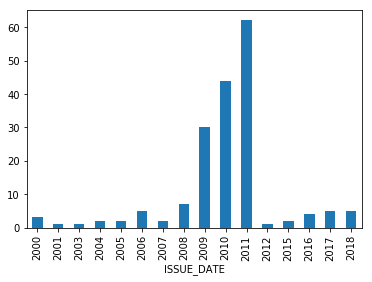

In [139]:
print("Min: {}".format(boiler_violations['ISSUE_DATE'].min()))
print("Max: {}".format(boiler_violations['ISSUE_DATE'].max()))

boiler_violations.groupby(boiler_violations['ISSUE_DATE'].dt.year).count()['BIN'].plot(kind="bar")

# Look at just Elevator dates

In [140]:
elevator_violations = all_violations[all_violations['VIOLATION_TYPE_CODE']  == 'E']
print(len(elevator_violations))

227005


Min: 2000-01-03 00:00:00
Max: 2019-04-17 00:00:00


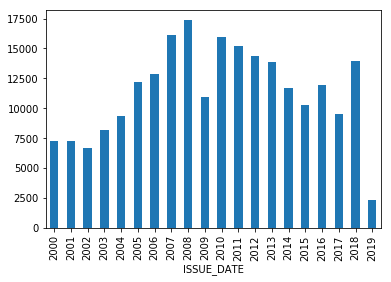

In [141]:
print("Min: {}".format(elevator_violations['ISSUE_DATE'].min()))
print("Max: {}".format(elevator_violations['ISSUE_DATE'].max()))

elevator_violations.groupby(elevator_violations['ISSUE_DATE'].dt.year).count()['BIN'].plot(kind="bar")

# Look at Boiler Inspections from: 
https://data.cityofnewyork.us/Housing-Development/DOB-NOW-Safety-Boiler/52dp-yji6

In [164]:
boiler_now_inspections = pd.read_csv("data/DOB_NOW_Boiler_Safety.csv")

In [166]:
list(boiler_now_inspections)

['Tracking Number',
 'Boiler ID',
 'Report Type',
 'ApplicantFirst Name',
 'Applicant Last Name',
 'Applicant License Type',
 'Applicant License Number',
 'Owner First Name',
 'Owner Last Name',
 'Boiler Make',
 'Boiler Model',
 'Pressure Type',
 'Inspection Type',
 'Inspection Date',
 'Defects Exist',
 'LFF (45 Days)',
 'LFF (180 Days)',
 'Filing Fee',
 'Total Amount Paid',
 'Report Status',
 'Bin Number']

# Look at these suckers over time

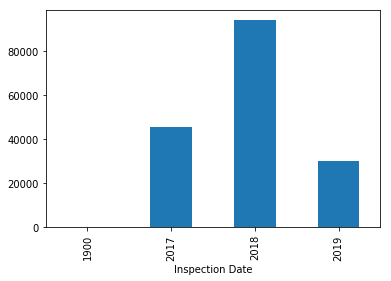

In [180]:
boiler_now_inspections['Inspection Date'] = pd.to_datetime(boiler_now_inspections['Inspection Date'])
boiler_now_inspections.groupby(boiler_now_inspections['Inspection Date'].dt.year).count()['Bin Number'].plot('bar')

In [181]:
defected_boilers = boiler_now_inspections[boiler_now_inspections['Defects Exist'] == 'Yes']

print(len(defected_boilers))
print(len(boiler_now_inspections))
len(defected_boilers) / len(boiler_now_inspections) * 100

13764
169583


8.116379589935312

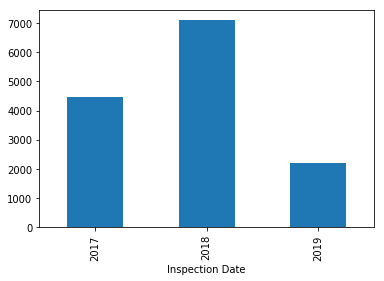

In [182]:
defected_boilers.groupby(defected_boilers['Inspection Date'].dt.year).count()['Bin Number'].plot('bar')

# Find intersection of elevator inspections and violations
We want to do this so we can sus out elevator inspections that did not result in a violation (our negative labels)

In [160]:
elevator_inspections.groupby('Elevtrs').count()['bin'].plot('bar')

KeyError: 'bin'

In [159]:
elevator_inspections = elevator_inspections.set_index('bin')

KeyError: 'bin'

In [161]:
elevator_violations = elevator_violations.set_index('BIN')

,bin,dt_lstm,tm_lstm,shap_ln,shape_r,feat_cd,name,grondlv,doitt_d,cnstrc_,...,Wrkr_Fl,WWOP,Latitud,Longitd,Borough,Address,BIS_Prf,Ttl_Prm,Total,cyclomd
4,3413894.0,2017-12-19,00:00:00.000,572.454981,13476.551074,2100.0,NaN,23.0,1283368.0,2014.0,...,0.0,0.0,40.702599,-73.985962,Brooklyn,181 FRONT STREET,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,7.0,39.0,https://nycdob.github.io/CycloMedia/simple#988...
6,4303910.0,2017-08-22,00:00:00.000,144.387972,1299.462415,2100.0,NaN,7.0,358250.0,1920.0,...,0.0,0.0,40.580151,-73.835030,QUEENS,194 BEACH 114 STREET NY 11694,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,0.0,10.0,https://nycdob.github.io/CycloMedia/simple#103...
93,4442123.0,2017-08-22,00:00:00.000,209.514474,1960.791883,2100.0,NaN,24.0,935225.0,1995.0,...,0.0,0.0,40.604111,-73.754433,Queens,10-74 BEACH 22 STREET,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,3.0,37.0,https://nycdob.github.io/CycloMedia/simple#105...
125,4454110.0,2017-08-22,00:00:00.000,664.717373,11274.281375,2100.0,NaN,8.0,27613.0,1975.0,...,0.0,0.0,40.596779,-73.764809,Queens,331 BEACH 31 STREET,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,0.0,16.0,https://nycdob.github.io/CycloMedia/simple#104...
127,4537941.0,2017-08-22,00:00:00.000,603.384580,19400.538317,2100.0,NaN,12.0,931571.0,1992.0,...,0.0,0.0,40.658829,-73.771294,Queens,168-35 ROCKAWAY BOULEVARD,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,0.0,10.0,https://nycdob.github.io/CycloMedia/simple#104...
157,3248905.0,2017-08-22,00:00:00.000,135.672758,1140.166930,2100.0,NaN,7.0,749448.0,1950.0,...,0.0,0.0,40.588409,-73.924873,Brooklyn,32 CYRUS AVENUE,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,1.0,31.0,https://nycdob.github.io/CycloMedia/simple#100...
159,3321826.0,2017-08-22,00:00:00.000,631.889611,12030.992886,2100.0,NaN,8.0,732505.0,1966.0,...,0.0,0.0,40.587589,-73.933121,Brooklyn,3080 VOORHIES AVENUE,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,1.0,12.0,https://nycdob.github.io/CycloMedia/simple#100...
185,3249695.0,2017-08-22,00:00:00.000,136.889504,1022.888005,2100.0,NaN,7.0,22658.0,1925.0,...,0.0,0.0,40.589008,-73.924538,Brooklyn,102 NOEL AVENUE Brooklyn NY 11229,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,0.0,4.0,https://nycdob.github.io/CycloMedia/simple#100...
245,4315205.0,2017-08-22,00:00:00.000,696.638564,9995.672641,2100.0,NaN,118.0,1079868.0,1954.0,...,0.0,0.0,40.700130,-73.852333,QUEENS,83-55 WOODHAVEN BOULEVARD NY 11421,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,0.0,18.0,https://nycdob.github.io/CycloMedia/simple#102...
311,4296867.0,2017-08-22,00:00:00.000,145.539607,959.425712,2100.0,NaN,6.0,91027.0,1910.0,...,0.0,0.0,40.606770,-73.820450,Queens,16 WEST 9 ROAD,http://a810-bisweb.nyc.gov/bisweb/PropertyProf...,1.0,19.0,https://nycdob.github.io/CycloMedia/simple#103...
